In [342]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

import math
import statistics
from collections import Counter

In [343]:
table = pd.read_csv('../practice_data/data_pregnant.csv')

### 전체 데이터 개수: 833개

In [344]:
len(table)

834

In [345]:
table['line'].sort_values().unique()

array([ 1.,  2.,  3.,  5.,  6.,  7.,  9., 10., 11., nan])

In [346]:
table['date'].sort_values().unique()

array(['2019. 7. 31.', '2019. 8. 1.', '2019. 8. 10.', '2019. 8. 11.',
       '2019. 8. 12.', '2019. 8. 13.', '2019. 8. 14.', '2019. 8. 15.',
       '2019. 8. 16.', '2019. 8. 2.', '2019. 8. 3.', '2019. 8. 5.',
       '2019. 8. 7.', '2019. 8. 8.', '2019. 8. 9.', nan], dtype=object)

### 임산부석에 사람이 앉아있는 경우의 수와 비율: 576, 69.15%
### 임산부석이 비어있는 경우의 수와 비율: 257, 30.85%

In [347]:
table['is_empty'].value_counts()

0.0    576
1.0    257
Name: is_empty, dtype: int64

In [348]:
len(table[table['is_empty']==0]) / len(table) * 100

69.06474820143885

In [349]:
len(table[table['is_empty']==1]) / len(table) * 100

30.815347721822544

In [350]:
table.head(1)

,date,time,line,start,stop,count_station,time.1,crowdedness,E,N,...,cellphone,thinking,sleep,earphone,talking,calling,reading,makeup,eating,writing
0,2019. 7. 31.,19:10:00,5.0,공덕,여의도,3.0,6.0,N,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
table.columns

Index(['date', 'time', 'line', 'start', 'stop', 'count_station', 'time.1',
       'crowdedness', 'E', 'N', 'F', 'old_age_seat', 'is_empty', 'empty_count',
       'female', 'male', 'age', 'child', 'teenage', 'youth', 'middle_age',
       'old_age', 'badge', 'pregnant', 'heavy', 'behavior1', 'behavior2',
       'behavior3', 'cellphone', 'thinking', 'sleep', 'earphone', 'talking',
       'calling', 'reading', 'makeup', 'eating', 'writing'],
      dtype='object')

#### 약 70%의 확률로 임산부석에 누군가가 앉아있다. 이 사람들이 전부 임산부일까?

### 임산부석 착석자가 임산부인 경우의 수와 비율: 26, 4.51% 

In [352]:
full = table[table['is_empty']==0]
print(len(full[full['pregnant']==1]))
print(len(full[full['pregnant']==1]) / len(full) * 100)

26
4.513888888888888


#### 심각한 수치임... 그럼 대체 어떤 사람들이 앉는지 좀 보자.

In [353]:
# 성별
print('여성이 앉은 경우의 수:', len(full[full['female']==1]))
print('여성이 앉은 비율:', (len(full[full['female']==1])/len(full)*100))
print('남성이 앉은 경우의 수:', len(full[full['male']==1]))
print('남성이 앉은 비율:', (len(full[full['male']==1])/len(full)*100))

여성이 앉은 경우의 수: 448
여성이 앉은 비율: 77.77777777777779
남성이 앉은 경우의 수: 128
남성이 앉은 비율: 22.22222222222222


In [354]:
# 연령대 (경우의 수)
full.groupby('age')['date'].count()

age
노년     100
어린이     11
중년     231
청년     228
청소년      6
Name: date, dtype: int64

In [355]:
# 연령대 (비율)
full.groupby('age')['date'].count().apply(lambda x: x / len(full) * 100)

age
노년     17.361111
어린이     1.909722
중년     40.104167
청년     39.583333
청소년     1.041667
Name: date, dtype: float64

In [356]:
# 무거운 짐을 갖고 있는 경우의 수
full['heavy'].value_counts()

0.0    383
1.0    192
Name: heavy, dtype: int64

In [357]:
# 무거운 짐을 갖고 있는 비율
full['heavy'].value_counts().apply(lambda x: x / len(full) * 100)

0.0    66.493056
1.0    33.333333
Name: heavy, dtype: float64

In [358]:
full.head(1)

,date,time,line,start,stop,count_station,time.1,crowdedness,E,N,...,cellphone,thinking,sleep,earphone,talking,calling,reading,makeup,eating,writing
0,2019. 7. 31.,19:10:00,5.0,공덕,여의도,3.0,6.0,N,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
# 행동
full.groupby('behavior1')['date'].size().apply(lambda x: x / len(full) *100)

behavior1
대화      5.208333
독서      1.041667
먹기      0.520833
멍      16.493056
이어폰     5.208333
잠      13.541667
통화      1.388889
필기      0.520833
핸드폰    52.083333
화장      0.520833
Name: date, dtype: float64

In [360]:
full.groupby('behavior2')['date'].size()

behavior2
대화      2
독서      1
먹기      1
멍       4
이어폰    30
잠      10
핸드폰    16
Name: date, dtype: int64

In [361]:
full.groupby('behavior3')['date'].size()

behavior3
잠    1
Name: date, dtype: int64

In [362]:
full.groupby('crowdedness')['date'].size()

crowdedness
E     73
F    266
N    237
Name: date, dtype: int64

In [363]:
table.groupby(['crowdedness','is_empty'])['date'].size()

crowdedness  is_empty
E            0.0          73
             1.0         118
F            0.0         266
             1.0          45
N            0.0         237
             1.0          94
Name: date, dtype: int64

In [364]:
table[table['E']==1].groupby('is_empty')['date'].size().apply(lambda x: x/len(table[table['E']==1])*100)

is_empty
0.0    38.219895
1.0    61.780105
Name: date, dtype: float64

In [365]:
table[table['N']==1].groupby('is_empty')['date'].size().apply(lambda x: x/len(table[table['N']==1])*100)

is_empty
0.0    71.601208
1.0    28.398792
Name: date, dtype: float64

In [366]:
table[table['F']==1].groupby('is_empty')['date'].size().apply(lambda x: x/len(table[table['F']==1])*100)

is_empty
0.0    85.530547
1.0    14.469453
Name: date, dtype: float64

노약자석 빈자리 여부와 임산부석 빈자리 여부 관계 정리
- 노약자석에 자리가 없을 경우, 21%로 임산부석에 누군가 앉아 있음
- 노약자석에 자리가 있을 경우, 38.7%로 임산부석에 누군가 앉아 있음

In [367]:
table[table['old_age_seat']==0].groupby('is_empty')['date'].size().apply(lambda x: x/len(table)*100)  

is_empty
0.0    30.455635
1.0    20.983213
Name: date, dtype: float64

In [368]:
table[table['old_age_seat']==1].groupby('is_empty')['date'].size().apply(lambda x: x/len(table)*100)  

is_empty
0.0    38.609113
1.0     9.832134
Name: date, dtype: float64

In [369]:
table[table['old_age_seat']==0].groupby('old_age')['date'].size() #여기에 퍼센테이지를 어떻게 구할까요..

old_age
0.0    206
1.0     48
Name: date, dtype: int64

## C. 호선별 열차칸 상황과 임산부석 관계	

1) 붐빔정도와 임산부석 착석 여부

2) 노약자석 빈자리 여부와 노년 이용자 착석 여부

In [370]:
table.tail()

,date,time,line,start,stop,count_station,time.1,crowdedness,E,N,...,cellphone,thinking,sleep,earphone,talking,calling,reading,makeup,eating,writing
829,2019. 8. 16.,18:16:00,1.0,신길,온수,7.0,14.0,F,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
830,2019. 8. 16.,18:29:00,1.0,신길,온수,7.0,14.0,F,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
831,2019. 8. 16.,18:40:00,7.0,온수,신중동,4.0,8.0,F,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
832,2019. 8. 16.,18:40:00,7.0,온수,신중동,4.0,8.0,F,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [371]:
table.dtypes

date              object
time              object
line             float64
start             object
stop              object
count_station    float64
time.1           float64
crowdedness       object
E                float64
N                float64
F                float64
old_age_seat     float64
is_empty         float64
empty_count      float64
female           float64
male             float64
age               object
child            float64
teenage          float64
youth            float64
middle_age       float64
old_age          float64
badge            float64
pregnant         float64
heavy            float64
behavior1         object
behavior2         object
behavior3         object
cellphone        float64
thinking         float64
sleep            float64
earphone         float64
talking          float64
calling          float64
reading          float64
makeup           float64
eating           float64
writing          float64
dtype: object

In [372]:
table['line'].sort_values().unique()

array([ 1.,  2.,  3.,  5.,  6.,  7.,  9., 10., 11., nan])

In [373]:
table['line'].dtypes

dtype('float64')

### 임산부가 아닌 사람이 탄 테이블을 만든다

In [374]:
not_empty = table[table['is_empty']== 0]

In [375]:
not_pregnant = not_empty[not_empty['pregnant'] == 0]

In [376]:
not_pregnant['pregnant'].unique()

array([0.])

## C-1) 호선별 붐빔정도와 임산부석의 비임산부 착석여부

### 1. 전체 숫자 확인

In [377]:
lines_total = pd.DataFrame(not_pregnant.groupby(['line','crowdedness'])['date'].size()).rename(columns={'date':'count_people'})
lines_total

count_people
line crowdedness              
1.0  E                      23
     F                      99
     N                      86
2.0  E                       1
     N                       4
3.0  F                       1
5.0  E                      14
     F                      63
     N                      59
6.0  E                       9
     F                      15
     N                      53
7.0  E                      12
     F                      24
     N                      15
9.0  E                       1
     F                       5
     N                       2
10.0 E                       6
     F                      44
     N                      11
11.0 F                       3

#### 각 호선별 붐빔정도에 따라 퍼센트를 구해줄 수 있는 함수 작성

In [378]:
def func_percentage(line):
    percentage = []
    for i in line['crowdedness'].unique():
        percentage.append(round(float(line[line['crowdedness'] == i]['count_people'])/line['count_people'].sum()*100,2))
    percentage
    return percentage

#### 라인별 착석자수로 이루어진 새로운 테이블 생성
퍼센트를 담을 list 생성

In [379]:
lines_total_counts = pd.DataFrame(not_empty[not_empty['pregnant'] == 0].groupby(['line','crowdedness'])['date'].size()).reset_index().rename(columns={'date':'count_people'})
lines_total_counts

,line,crowdedness,count_people
0,1.0,E,23
1,1.0,F,99
2,1.0,N,86
3,2.0,E,1
4,2.0,N,4
5,3.0,F,1
6,5.0,E,14
7,5.0,F,63
8,5.0,N,59
9,6.0,E,9


In [380]:
lines_p_list = []

### 2. 호선별 임산부석의 비임산부 착석여부

---
<1호선>

In [381]:
line1 = lines_total_counts[lines_total_counts['line'] == 1].copy()
line1['people_percentage'] = func_percentage(line1)
line1

,line,crowdedness,count_people,people_percentage
0,1.0,E,23,11.06
1,1.0,F,99,47.60
2,1.0,N,86,41.35


---
<2호선>

In [382]:
line2 = lines_total_counts[lines_total_counts['line'] == 2].copy()
line2['people_percentage'] = func_percentage(line2)
line2

,line,crowdedness,count_people,people_percentage
3,2.0,E,1,20.0
4,2.0,N,4,80.0


---
<3호선>

In [383]:
line3 = lines_total_counts[lines_total_counts['line'] == 3].copy()
line3['people_percentage'] = func_percentage(line3)
line3

,line,crowdedness,count_people,people_percentage
5,3.0,F,1,100.0


---
<5호선>

In [384]:
line5 = lines_total_counts[lines_total_counts['line'] == 5].copy()
line5['people_percentage'] = func_percentage(line5)
line5

,line,crowdedness,count_people,people_percentage
6,5.0,E,14,10.29
7,5.0,F,63,46.32
8,5.0,N,59,43.38


---
<6호선>

In [385]:
line6 = lines_total_counts[lines_total_counts['line'] == 6].copy()
line6['people_percentage'] = func_percentage(line6)
line6

,line,crowdedness,count_people,people_percentage
9,6.0,E,9,11.69
10,6.0,F,15,19.48
11,6.0,N,53,68.83


---
<7호선>

In [386]:
line7 = lines_total_counts[lines_total_counts['line'] == 7].copy()
line7['people_percentage'] = func_percentage(line7)
line7

,line,crowdedness,count_people,people_percentage
12,7.0,E,12,23.53
13,7.0,F,24,47.06
14,7.0,N,15,29.41


---
<9호선>

In [387]:
line9 = lines_total_counts[lines_total_counts['line'] == 9].copy()
line9['people_percentage'] = func_percentage(line9)
line9

,line,crowdedness,count_people,people_percentage
15,9.0,E,1,12.5
16,9.0,F,5,62.5
17,9.0,N,2,25.0


---
<분당선>

In [388]:
line10 = lines_total_counts[lines_total_counts['line'] == 10].copy()
line10['people_percentage'] = func_percentage(line10)
line10

,line,crowdedness,count_people,people_percentage
18,10.0,E,6,9.84
19,10.0,F,44,72.13
20,10.0,N,11,18.03


---
<경의중앙선>

In [389]:
line11 = lines_total_counts[lines_total_counts['line'] == 11].copy()
line11['people_percentage'] = func_percentage(line11)
line11

,line,crowdedness,count_people,people_percentage
21,11.0,F,3,100.0


### 3. 각 호선별 퍼센테이지 컬럼 전체보기

In [390]:
for i in lines_total_counts['line'].unique():
    percentages = func_percentage(lines_total_counts[lines_total_counts['line'] == i])
    for p in percentages:
        lines_p_list.append(p)

print(lines_p_list)

print(len(lines_p_list))
lines_total_counts['percentage'] = lines_p_list

[11.06, 47.6, 41.35, 20.0, 80.0, 100.0, 10.29, 46.32, 43.38, 11.69, 19.48, 68.83, 23.53, 47.06, 29.41, 12.5, 62.5, 25.0, 9.84, 72.13, 18.03, 100.0]
22


In [397]:
lines_total_counts

,line,crowdedness,count_people,percentage
0,1.0,E,23,11.06
1,1.0,F,99,47.60
2,1.0,N,86,41.35
3,2.0,E,1,20.00
4,2.0,N,4,80.00
5,3.0,F,1,100.00
6,5.0,E,14,10.29
7,5.0,F,63,46.32
8,5.0,N,59,43.38
9,6.0,E,9,11.69


### C-1) 막대 그래프 그려보기(countplot)

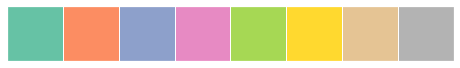

In [419]:
pal = sns.color_palette("Set2")
sns.palplot(pal)
sns.set_palette(pal)

#### 호선별 데이터양 분포

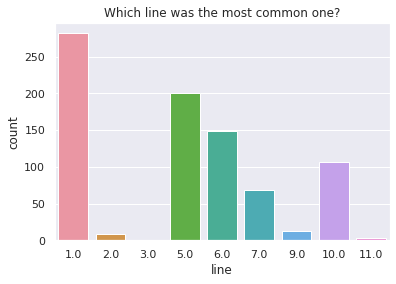

In [420]:
sns.countplot(x="line", data=table)
plt.title("Which line was the most common one?")
plt.show()

#### 각 라인별로 얼마나 자리가 비었었는가(관찰된 횟수를 기준으로)

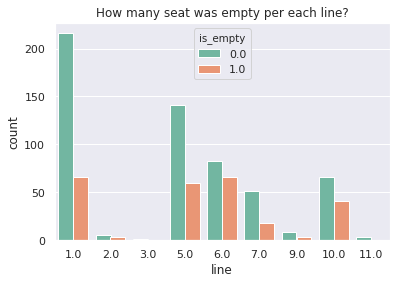

In [421]:
sns.countplot(x="line", hue="is_empty", data=table)
plt.title("How many seat was empty per each line?")
plt.show()


파란색 막대가 임산부석에 사람이 있는 경우, 주황색 막대가 없는 경우다.
전체적으로 사람이 있는 경우가 비어있는 경우보다 훨씬 많음을 알 수 있다.

## 붐빔정도와 임산부석 비었음의 상관관계

### 전체 경향성

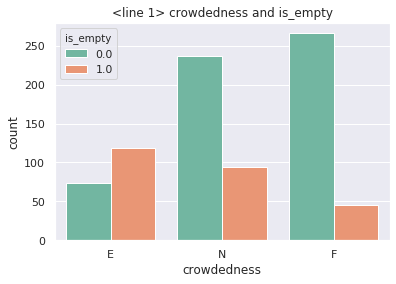

In [422]:
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=table)
plt.title("<line 1> crowdedness and is_empty")
plt.show()

열차칸 내가 붐비지 않을때 임산부석이 비워진 비율이 가장 높다.

---
#### 각 호선별 경향성 - 멤버들이 주로 타고다녔던 호선

<1호선>

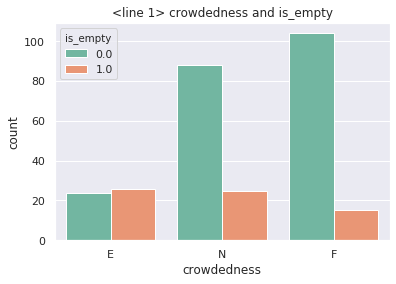

In [423]:
line1_data = pd.DataFrame(table[table['line'] == 1])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line1_data)
plt.title("<line 1> crowdedness and is_empty")
plt.show()

<5호선>

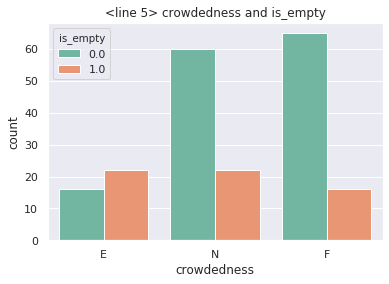

In [424]:
line5_data = pd.DataFrame(table[table['line'] == 5])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line5_data)
plt.title("<line 5> crowdedness and is_empty")
plt.show()

<6호선>

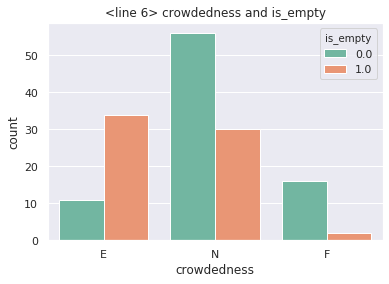

In [425]:
line6_data = pd.DataFrame(table[table['line'] == 6])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line6_data)
plt.title("<line 6> crowdedness and is_empty")
plt.show()

<7호선>

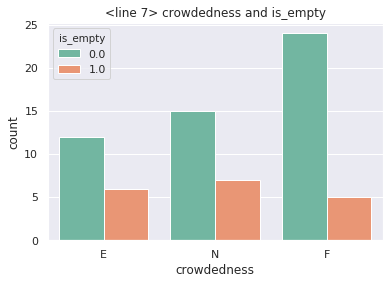

In [426]:
line7_data = pd.DataFrame(table[table['line'] == 7])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line7_data)
plt.title("<line 7> crowdedness and is_empty")
plt.show()

<분당선>

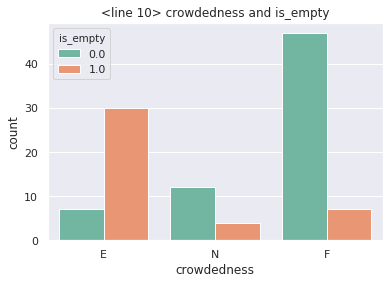

In [427]:
line10_data = pd.DataFrame(table[table['line'] == 10])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line10_data)
plt.title("<line 10> crowdedness and is_empty")
plt.show()

---
#### 각 호선별 경향성 - 멤버들이 주로 타고다니지 않은 호선

<2호선>

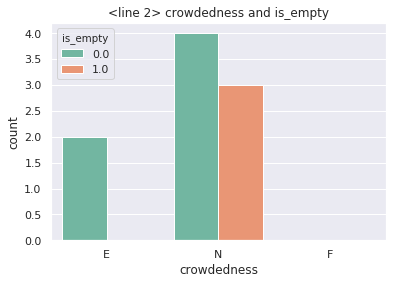

In [428]:
line2_data = pd.DataFrame(table[table['line'] == 2])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line2_data)
plt.title("<line 2> crowdedness and is_empty")
plt.show()

<3호선>

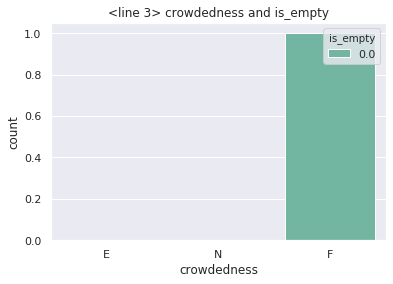

In [429]:
line3_data = pd.DataFrame(table[table['line'] == 3])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line3_data)
plt.title("<line 3> crowdedness and is_empty")
plt.show()

<9호선>

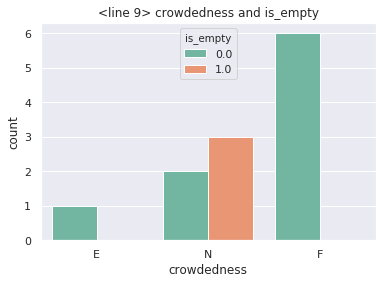

In [430]:
line9_data = pd.DataFrame(table[table['line'] == 9])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line9_data)
plt.title("<line 9> crowdedness and is_empty")
plt.show()

<경의중앙선>

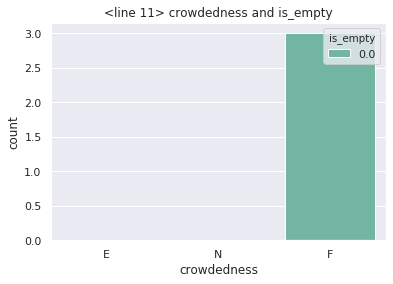

In [431]:
line11_data = pd.DataFrame(table[table['line'] == 11])
sns.countplot(x="crowdedness", hue="is_empty", order=['E','N','F'], data=line11_data)
plt.title("<line 11> crowdedness and is_empty")
plt.show()